- Hubungan UMKM karena banyak yg belum online (cari perbedaan online offline)

- Perbandingan jumlah UMKM tiap kategori yang sudah dan belum online 

- Perbedaan omset 2021 vs 2020 (Pandemic era)

- Korelasi sudah dan belum online dengan omset yang didapat

- Group yg negatif dgn belum online, jenis umkm

- Lihat daya tahan perusahaan dari tanggal berdiri vs perbandingan omset 2020 & 2021 --> apakah umkm ini dapat bertahan dalam pandemi

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/haddad9/files/master/gn_dataset.csv')

In [ ]:
df.head()

,id,nama_usaha,email_usaha,kategori,belum_online,tgl_dibentuk,omset_2020,omset_2021,provinsi
0,1,PT Sihombing,jumari.prastuti@siregar.co,kuliner,1,2017-11-09,34.485073,44.024189,jawa_timur
1,2,UD Mayasari,lthamrin@waskita.net,pengrajin_kulit,0,2010-07-30,48.372881,10.048041,jawa_timur
2,3,Usamah Maulana,susanti.latika@hastuti.info,kuliner,0,2015-05-27,17.305106,59.920665,jawa_barat
3,4,UD Firmansyah,lmardhiyah@prabowo.asia,kuliner,0,2010-12-05,24.302636,53.221659,jawa_tengah
4,5,UD Mahendra Permadi,karma.andriani@palastri.name,pengrajin_kulit,1,2005-08-23,65.246662,57.696549,jawa_timur


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             500 non-null    int64  
 1   nama_usaha     500 non-null    object 
 2   email_usaha    500 non-null    object 
 3   kategori       500 non-null    object 
 4   belum_online   500 non-null    int64  
 5   tgl_dibentuk   500 non-null    object 
 6   omset_2020     500 non-null    float64
 7   omset_2021     500 non-null    float64
 8   provinsi       500 non-null    object 
 9   selisih_omset  500 non-null    float64
dtypes: float64(3), int64(2), object(5)
memory usage: 39.2+ KB


In [ ]:
df.shape

(500, 9)

In [ ]:
df.isna().any()

id              False
nama_usaha      False
email_usaha     False
kategori        False
belum_online    False
tgl_dibentuk    False
omset_2020      False
omset_2021      False
provinsi        False
dtype: bool

- Perbandingan jumlah UMKM tiap kategori yang sudah dan belum online

<AxesSubplot:title={'center':'Perbandingan Jumlah UMKM yang Sudah Online dan Belum Perkategori'}, xlabel='kategori'>

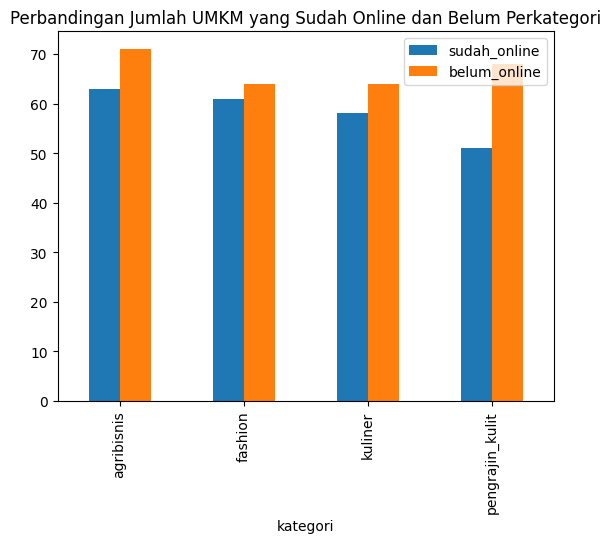

In [ ]:
belum_online = df[df.belum_online == 1][["kategori", "belum_online"]].groupby(by="kategori").count().reset_index()
sudah_online = df[df.belum_online == 0][["kategori", "belum_online"]].groupby(by="kategori").count().reset_index().rename(columns = {"belum_online": "sudah_online"})
online_binary_category = belum_online.merge(sudah_online, on="kategori", how="inner")
online_binary_category.plot(x="kategori", y=["sudah_online", "belum_online"], kind="bar", title='Perbandingan Jumlah UMKM yang Sudah Online dan Belum Perkategori')

Dari visualisasi data di atas dapat dilihat bahwa jumlah UMKM tiap kategori relatif seimbang atau sama banyak antara yang sudah online (terkoneksi dengan teknologi digital) dengan yang belum online sehingga kedua jenis tersebut menjadi cocok untuk dibandingkan

- Perbedaan omset 2021 vs 2020 (Pandemic era)

In [ ]:
offline = df[df.belum_online == 1]
online = df[df.belum_online == 0]

In [ ]:
print("Max omset 2020_online \t: " + str(online['omset_2020'].max()) +
    "\nMax omset 2020_offline \t: " + str(offline['omset_2020'].max()) +
    "\nMax omset 2021_online \t: " + str(online['omset_2021'].max()) +
    "\nMax omset 2021_offline \t: " + str(offline['omset_2021'].max()) + 
    "\nMin omset 2020_online \t: " + str(online['omset_2020'].min()) +
    "\nMin omset 2020_offline \t: " + str(offline['omset_2020'].min()) + 
    "\nMin omset 2021_online \t: " + str(online['omset_2021'].min()) +
    "\nMin omset 2021_offline \t: " + str(offline['omset_2021'].min()) +
    "\nMean omset 2020_online \t: " + str(online['omset_2020'].mean()) +
    "\nMean omset 2020_offline : " + str(offline['omset_2020'].mean()) +
    "\nMean omset 2021_online \t: " + str(online['omset_2021'].mean()) +
    "\nMean omset 2021_offline : " + str(offline['omset_2021'].mean()))

Max omset 2020_online 	: 69.96052796182755
Max omset 2020_offline 	: 69.90505768501362
Max omset 2021_online 	: 69.9200876371422
Max omset 2021_offline 	: 69.7731200025278
Min omset 2020_online 	: 1.7928865117531814
Min omset 2020_offline 	: 1.7554198516343729
Min omset 2021_online 	: 2.013998362589098
Min omset 2021_offline 	: 3.3566958754487985
Mean omset 2020_online 	: 34.768148650407234
Mean omset 2020_offline : 36.209660729079886
Mean omset 2021_online 	: 37.19741135424281
Mean omset 2021_offline : 36.89436265646603


In [ ]:
arrays = [['Max', 'Max', 'Max', 'Max', 'Min', 'Min', 'Min', 'Min', 'Mean', 'Mean', 'Mean', 'Mean'],
          ['2020', '2020', '2021', '2021', '2020', '2020', '2021', '2021','2020', '2020', '2021', '2021'],
          ['Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline', 'Online', 'Offline','Online', 'Offline', 'Online', 'Offline']] 
index = pd.MultiIndex.from_arrays(arrays, names=('Type', 'Tahun','Kondisi'))
Tabel = pd.DataFrame({'': [online['omset_2020'].max(),offline['omset_2020'].max(),online['omset_2021'].max(),offline['omset_2021'].max(),online['omset_2020'].min(),offline['omset_2020'].min(),online['omset_2021'].min(),offline['omset_2021'].min(),online['omset_2020'].mean(),offline['omset_2020'].mean(),online['omset_2021'].mean(),offline['omset_2021'].mean()]},
                  index=index)
print(Tabel)

                             
Type Tahun Kondisi           
Max  2020  Online   69.960528
           Offline  69.905058
     2021  Online   69.920088
           Offline  69.773120
Min  2020  Online    1.792887
           Offline   1.755420
     2021  Online    2.013998
           Offline   3.356696
Mean 2020  Online   34.768149
           Offline  36.209661
     2021  Online   37.197411
           Offline  36.894363


Terlihat bahwa omset secara umum yang didapatkan oleh UMKM masih jauh dari definisi usaha mikro yang rata2 omsetnya dapat mencapai 500 juta rupiah. Omset maksimal yang dimiliki oleh UMKM pada tahun 2020 dan 2021 relatif sama yaitu sebesar 69 juta rupiah, sementara omset minimumnya hanya sekitar 1 juta rupiah. Sedangkan omset rata-ratanya adalah berkisar 35 juta rupiah hingga 37 juta rupiah. Dapat dilihat juga tidak terdapat perbedaan yang signifikan pada omset antara UMKM yang sudah online dengan yang belum baik pada tahun 2020 maupun tahun 2021.

In [ ]:
df[df["nama_usaha"] == 'UD Mayasari']

,id,nama_usaha,email_usaha,kategori,belum_online,tgl_dibentuk,omset_2020,omset_2021,provinsi
1,2,UD Mayasari,lthamrin@waskita.net,pengrajin_kulit,0,2010-07-30,48.372881,10.048041,jawa_timur
46,47,UD Mayasari,hassanah.tomi@hutasoit.name,agribisnis,1,2010-07-15,50.068470,28.287523,jawa_timur


Usaha dapat mempunyai lebih dari satu jenis kategori usaha

In [ ]:
df[df["kategori"] == 'pengrajin_kulit']

,id,nama_usaha,email_usaha,kategori,belum_online,tgl_dibentuk,omset_2020,omset_2021,provinsi
1,2,UD Mayasari,lthamrin@waskita.net,pengrajin_kulit,0,2010-07-30,48.372881,10.048041,jawa_timur
4,5,UD Mahendra Permadi,karma.andriani@palastri.name,pengrajin_kulit,1,2005-08-23,65.246662,57.696549,jawa_timur
6,7,Susanti,bdamanik@gunawan.asia,pengrajin_kulit,1,2005-03-01,33.181349,69.773120,DKI_jakarta
8,9,PD Riyanti,osamosir@megantara.asia,pengrajin_kulit,1,2010-11-27,11.993000,29.118372,jawa_tengah
10,11,UD Kuswoy,sadina15@winarno.tv,pengrajin_kulit,1,2008-01-24,11.156663,66.493515,jawa_tengah
...,...,...,...,...,...,...,...,...,...
472,473,CV Namaga Maryati,kunthara.gunarto@rajata.go.id,pengrajin_kulit,0,2004-11-03,62.507223,5.489736,jawa_tengah
481,482,Astuti,prabowo.jindra@usada.in,pengrajin_kulit,0,2000-01-10,16.338222,60.892051,jawa_barat
483,484,PD Wasita Narpati,sadina.susanti@puspita.biz.id,pengrajin_kulit,1,2010-09-03,15.852947,62.195949,jawa_barat
487,488,CV Prasetya,jindra51@napitupulu.in,pengrajin_kulit,0,2006-12-30,60.460047,18.496378,DKI_jakarta


In [ ]:
df['selisih_omset'] = df['omset_2021'] - df['omset_2020']
df

,id,nama_usaha,email_usaha,kategori,belum_online,tgl_dibentuk,omset_2020,omset_2021,provinsi,selisih_omset
0,1,PT Sihombing,jumari.prastuti@siregar.co,kuliner,1,2017-11-09,34.485073,44.024189,jawa_timur,9.539116
1,2,UD Mayasari,lthamrin@waskita.net,pengrajin_kulit,0,2010-07-30,48.372881,10.048041,jawa_timur,-38.324840
2,3,Usamah Maulana,susanti.latika@hastuti.info,kuliner,0,2015-05-27,17.305106,59.920665,jawa_barat,42.615558
3,4,UD Firmansyah,lmardhiyah@prabowo.asia,kuliner,0,2010-12-05,24.302636,53.221659,jawa_tengah,28.919023
4,5,UD Mahendra Permadi,karma.andriani@palastri.name,pengrajin_kulit,1,2005-08-23,65.246662,57.696549,jawa_timur,-7.550113
...,...,...,...,...,...,...,...,...,...,...
495,496,PD Narpati,ikuswandari@kuswoyo.ac.id,pengrajin_kulit,1,2005-06-20,62.377593,34.230417,DKI_jakarta,-28.147176
496,497,UD Haryanti Yolanda,purwanti.pangeran@aryani.go.id,fashion,1,2004-10-22,65.197637,32.414061,jawa_timur,-32.783575
497,498,PT Hartati,gandi46@uyainah.ac.id,fashion,1,2006-10-09,8.536465,45.449189,jawa_timur,36.912725
498,499,PT Kuswandari,situmorang.halima@pratiwi.info,agribisnis,0,2012-07-19,9.053474,15.480808,jawa_barat,6.427334


<AxesSubplot:xlabel='omset_2020'>

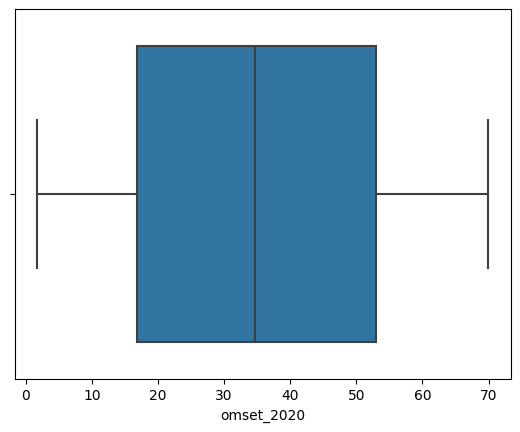

In [ ]:
sns.boxplot(x=df["omset_2020"])

<AxesSubplot:xlabel='omset_2021'>

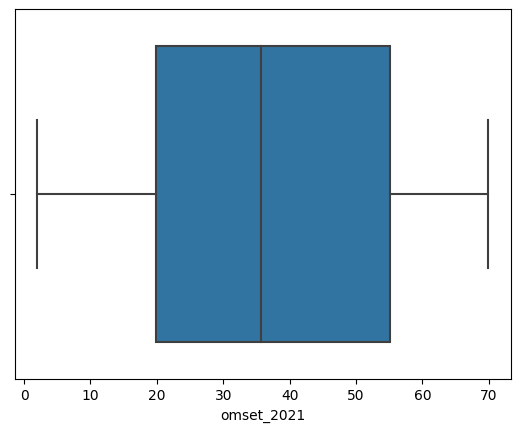

In [ ]:
sns.boxplot(x=df["omset_2021"])

In [ ]:
df_Check = df[['kategori','belum_online','selisih_omset']]
df_Check

,kategori,belum_online,selisih_omset
0,kuliner,1,9.539116
1,pengrajin_kulit,0,-38.324840
2,kuliner,0,42.615558
3,kuliner,0,28.919023
4,pengrajin_kulit,1,-7.550113
...,...,...,...
495,pengrajin_kulit,1,-28.147176
496,fashion,1,-32.783575
497,fashion,1,36.912725
498,agribisnis,0,6.427334


In [ ]:
df_Check.sort_values('selisih_omset', ascending=False)

,kategori,belum_online,selisih_omset
14,pengrajin_kulit,0,64.685101
452,fashion,1,63.989941
118,fashion,1,63.102990
149,pengrajin_kulit,1,63.061988
58,agribisnis,1,61.951850
...,...,...,...
96,fashion,1,-57.570319
366,agribisnis,0,-57.778860
161,kuliner,1,-58.408858
232,agribisnis,1,-59.392156


In [ ]:
df_Check = df_Check[df_Check["selisih_omset"] < 0]

In [ ]:
df_Check.sort_values('selisih_omset', ascending=True)

,kategori,belum_online,selisih_omset
475,fashion,1,-61.769441
232,agribisnis,1,-59.392156
161,kuliner,1,-58.408858
366,agribisnis,0,-57.778860
96,fashion,1,-57.570319
...,...,...,...
219,agribisnis,0,-0.794844
412,agribisnis,0,-0.669407
427,kuliner,1,-0.458834
394,fashion,0,-0.363863


selisih omset berkurang namun sudah menggunakan teknologi, berarti teknologi bukan solusi utama dari pengembangan bisnisnya. --> ada faktor lain.

In [ ]:
df[df["kategori"] == 'pengrajin_kulit']

,id,nama_usaha,email_usaha,kategori,belum_online,tgl_dibentuk,omset_2020,omset_2021,provinsi,selisih_omset
1,2,UD Mayasari,lthamrin@waskita.net,pengrajin_kulit,0,2010-07-30,48.372881,10.048041,jawa_timur,-38.324840
4,5,UD Mahendra Permadi,karma.andriani@palastri.name,pengrajin_kulit,1,2005-08-23,65.246662,57.696549,jawa_timur,-7.550113
6,7,Susanti,bdamanik@gunawan.asia,pengrajin_kulit,1,2005-03-01,33.181349,69.773120,DKI_jakarta,36.591771
8,9,PD Riyanti,osamosir@megantara.asia,pengrajin_kulit,1,2010-11-27,11.993000,29.118372,jawa_tengah,17.125372
10,11,UD Kuswoy,sadina15@winarno.tv,pengrajin_kulit,1,2008-01-24,11.156663,66.493515,jawa_tengah,55.336852
...,...,...,...,...,...,...,...,...,...,...
472,473,CV Namaga Maryati,kunthara.gunarto@rajata.go.id,pengrajin_kulit,0,2004-11-03,62.507223,5.489736,jawa_tengah,-57.017487
481,482,Astuti,prabowo.jindra@usada.in,pengrajin_kulit,0,2000-01-10,16.338222,60.892051,jawa_barat,44.553830
483,484,PD Wasita Narpati,sadina.susanti@puspita.biz.id,pengrajin_kulit,1,2010-09-03,15.852947,62.195949,jawa_barat,46.343002
487,488,CV Prasetya,jindra51@napitupulu.in,pengrajin_kulit,0,2006-12-30,60.460047,18.496378,DKI_jakarta,-41.963669


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2503cef0-eb44-4ef5-b179-8de13e52ae55' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>